# Trabalhando gráficos

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregando esses arquivos.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [104]:
dados = pd.read_csv('sinasc_RO_2019.csv')
df = pd.DataFrame(dados)

####  2) Montando gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [105]:
# Aqui estou limpando os dados
df.dropna(subset=['APGAR5', 'APGAR1'], inplace=True)
df.loc[df['ESTCIVMAE'] == 9.0, 'ESTCIVMAE'] = np.nan
df.loc[df['GESTACAO'] == 9.0, 'GESTACAO'] = np.nan
df.loc[df['CONSULTAS'] == 9.0, 'CONSULTAS'] = np.nan
df.loc[df['SEXO'] == 0, 'SEXO'] = np.nan

In [106]:
variaveis = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']
variaveis = df[variaveis]

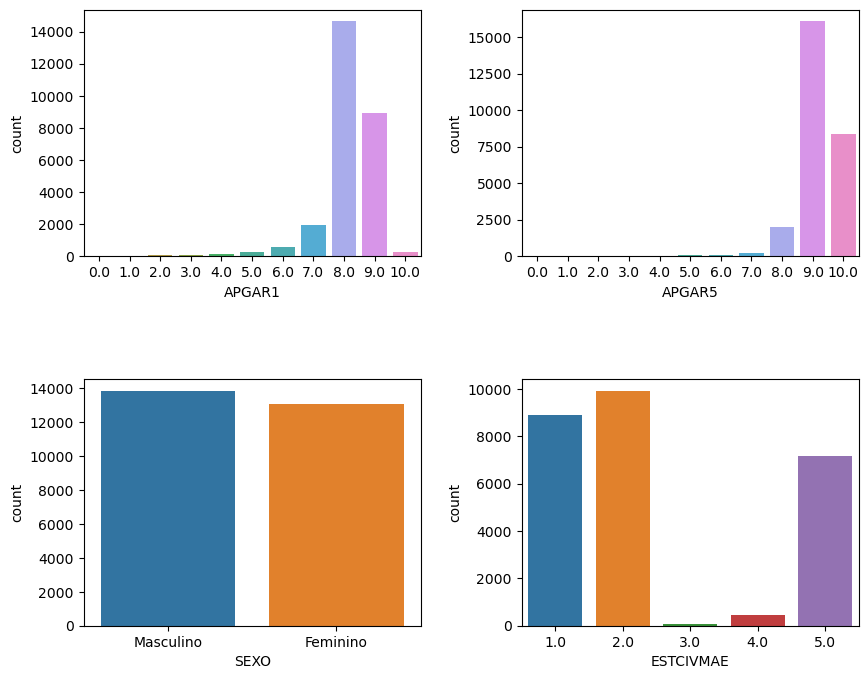

In [107]:
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x=df['APGAR1'], data=variaveis)
sns.countplot(ax = axes[0, 1], x=df['APGAR5'], data=variaveis)
sns.countplot(ax = axes[1, 0], x=df['SEXO'], data=variaveis)
sns.countplot(ax = axes[1, 1], x=df['ESTCIVMAE'], data=variaveis)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '37 a 41 semanas'),
  Text(1, 0, '32 a 36 semanas'),
  Text(2, 0, '42 semanas e mais'),
  Text(3, 0, '28 a 31 semanas'),
  Text(4, 0, '22 a 27 semanas'),
  Text(5, 0, 'Menos de 22 semanas')])

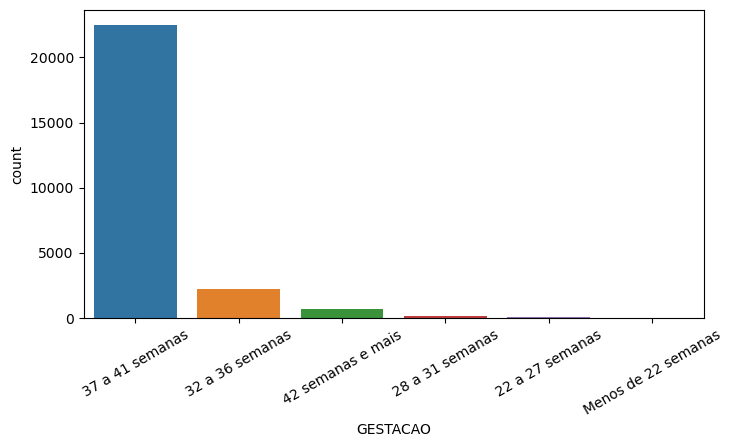

In [108]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['GESTACAO'], data=variaveis, order=variaveis['GESTACAO'].value_counts().index)
plt.xticks(rotation=30)

#### 3) Montando um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

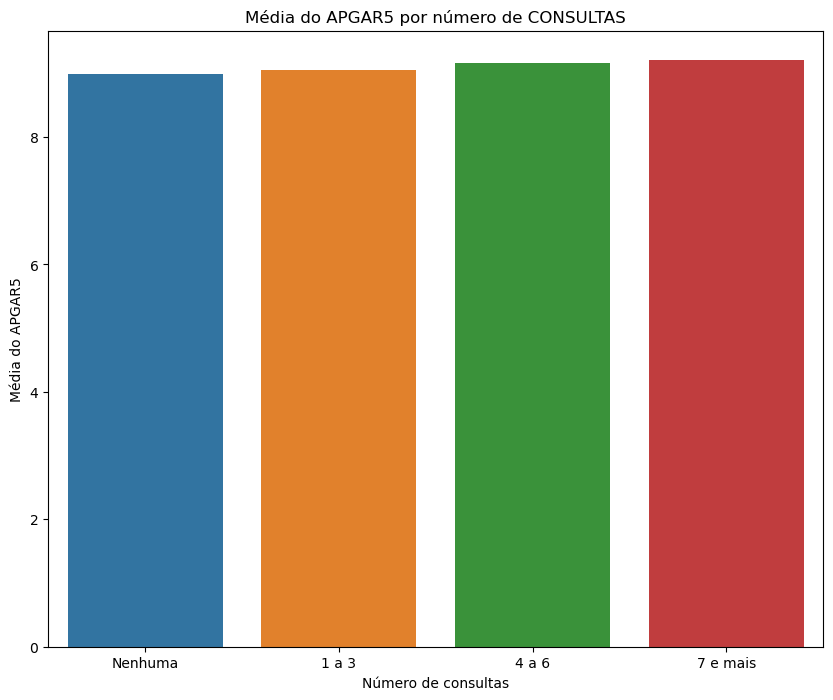

In [109]:
df_grouped = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

df_grouped['CONSULTAS'] = df_grouped['CONSULTAS'].map({1: 'Nenhuma', 2: '1 a 3', 3: '4 a 6', 4: '7 e mais'})

sns.barplot(data=df_grouped, x='CONSULTAS', y='APGAR5')
plt.xlabel('Número de consultas')
plt.ylabel('Média do APGAR5')
plt.title('Média do APGAR5 por número de CONSULTAS')
plt.show()


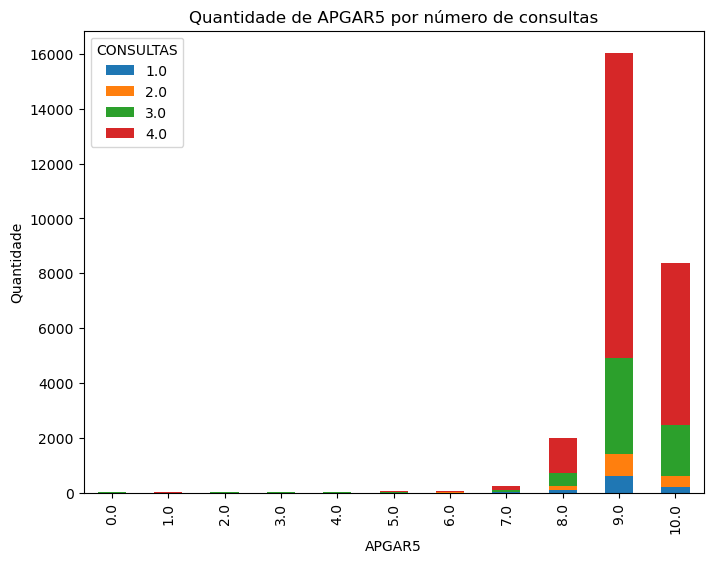

In [110]:
table = pd.crosstab(variaveis['APGAR5'], variaveis['CONSULTAS'])

table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('APGAR5')
plt.ylabel('Quantidade')
plt.title('Quantidade de APGAR5 por número de consultas')
plt.show()

####  4) Montando um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

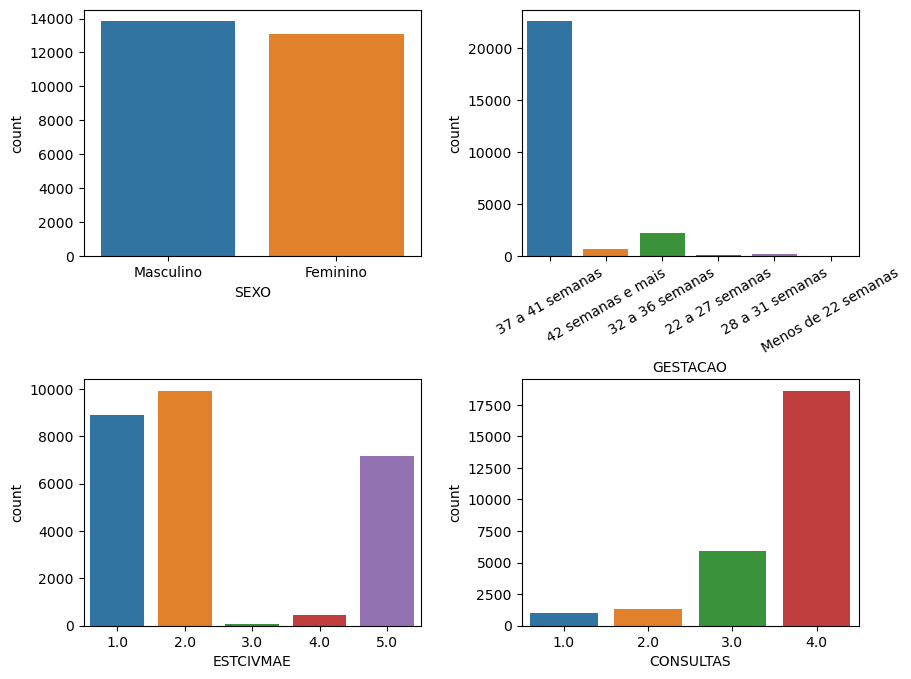

In [111]:
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax=axes[0, 0], x=df['SEXO'], data=variaveis)
sns.countplot(ax=axes[0, 1], x=df['GESTACAO'], data=variaveis)
axes[0, 1].tick_params(axis="x", rotation = 30)
sns.countplot(ax=axes[1, 0], x=df['ESTCIVMAE'], data=variaveis)
sns.countplot(ax=axes[1, 1], x=df['CONSULTAS'], data=variaveis)

plt.subplots_adjust(wspace=0.3, hspace=0.5)